Esta es la segunda parte del trabajo. Aquí haremos una exploración más amplia de los datos.

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [79]:
df_movies = pd.read_csv("Movies_ETL.csv", sep=",")

In [80]:
df_movies.head()

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,companies_names,idcompanies,countries_names,idcountries,lenguages_names,id_lenguages,names_actors,director,return,release_year
0,30000000.0,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,['Pixar Animation Studios'],[3],['United States of America'],['US'],['English'],['en'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,12.451801,1995
1,65000000.0,8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[559, 2550, 10201]",['United States of America'],['US'],"['English', 'Français']","['en', 'fr']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,4.043035,1995
2,0.0,15602.0,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,"['Warner Bros.', 'Lancaster Gate']","[6194, 19464]",['United States of America'],['US'],['English'],['en'],"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,0.000000,1995
3,16000000.0,31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,['Twentieth Century Fox Film Corporation'],[306],['United States of America'],['US'],['English'],['en'],"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,5.090760,1995
4,0.0,11862.0,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,"['Sandollar Productions', 'Touchstone Pictures']","[5842, 9195]",['United States of America'],['US'],['English'],['en'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,0.000000,1995


Repasemos primero que columnas tenemos y si contienen valores nulos.

In [81]:
print(df_movies.isnull().sum())

budget                   0
id                       0
original_language       11
overview               941
popularity               0
release_date             0
revenue                  0
runtime                246
status                  80
tagline              25026
title                    0
vote_average             0
vote_count               0
idcollection         40954
name_collection      40954
genres_names             0
idgenres                 0
companies_names          0
idcompanies              0
countries_names          0
idcountries              0
lenguages_names          0
id_lenguages             0
names_actors             0
director               835
return                   0
release_year             0
dtype: int64


Comenzando por la columna id eliminamos las filas duplicadas y se restableció el índice. Además se observó que el tipo de dato no era un entero así que también se modificó.

In [82]:
df_movies.drop_duplicates(inplace=True)
df_movies.drop_duplicates(subset=['id'],inplace=True)
df_movies=df_movies.reset_index(drop=True)

In [83]:
df_movies['id'] = df_movies['id'].astype(int)

In [84]:
df_movies.drop_duplicates(subset=['title'],inplace=True)
df_movies=df_movies.reset_index(drop=True)
df_movies.shape

(42195, 27)

Buscamos y analizamos valores nulos.

In [85]:
df_movies.isnull().sum().sort_values(ascending=False)

idcollection         37839
name_collection      37839
tagline              23156
overview               902
director               812
runtime                239
status                  75
original_language       11
companies_names          0
return                   0
names_actors             0
id_lenguages             0
lenguages_names          0
idcountries              0
countries_names          0
idcompanies              0
budget                   0
idgenres                 0
genres_names             0
id                       0
vote_count               0
vote_average             0
title                    0
revenue                  0
release_date             0
popularity               0
release_year             0
dtype: int64

In [86]:
df_subset = df_movies[['idcollection', 'name_collection', 'tagline', 'overview']]
print(df_subset)

       idcollection                 name_collection  \
0           10194.0            Toy Story Collection   
1               NaN                             NaN   
2          119050.0       Grumpy Old Men Collection   
3               NaN                             NaN   
4           96871.0  Father of the Bride Collection   
...             ...                             ...   
42190           NaN                             NaN   
42191           NaN                             NaN   
42192           NaN                             NaN   
42193           NaN                             NaN   
42194           NaN                             NaN   

                                                 tagline  \
0                                                    NaN   
1              Roll the dice and unleash the excitement!   
2      Still Yelling. Still Fighting. Still Ready for...   
3      Friends are the people who let you be yourself...   
4      Just When His World Is Back To N

Comencemos analizando las columnas con valores nulos y de eso dependerá que haremos con ellas.
Las columnas id collection y name collection están estrechamente relacionadas es por esto que los valores nulos son muy altos. Esto es porque la mayoría de las películas no pertenecen a una franquicia. La eliminación de estas columnas no afectarán al sistema de recomendación final.

Tagline: No todas las películas tienen una frase célebre y la eliminación de esa columna tampoco afectará el resultado final.

Las columnas original_language y status tienen pocos valores faltantes pero analizandolas sé que no serán necesarias.

Aprovecho para eliminar varias columnas extras las cuales son: id_lenguages, idcountries, idcompanies, idgenres, countries_names y lenguages_names.

Si bien la columna overview no me interesa para este EDA, lo voy a dejar porque sí lo voy a necesitar para el sistema de recomendación.


In [87]:
df_movies.drop(['idcollection', 'name_collection', 'tagline', 'original_language', 'status', 'id_lenguages', 'idcountries', 'idcompanies', 'idgenres', 'countries_names', 'lenguages_names'], axis=1, inplace=True)

In [88]:
df_movies.head()

,budget,id,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genres_names,companies_names,names_actors,director,return,release_year
0,30000000.0,862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,12.451801,1995
1,65000000.0,8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,4.043035,1995
2,0.0,15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,0.000000,1995
3,16000000.0,31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,5.090760,1995
4,0.0,11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']","['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,0.000000,1995


Rellenamos los campos faltantes de la columna directores.

In [89]:
#Rellenamos los datos nulos de la columna directores.
df_movies['director'] = df_movies['director'].fillna('Sin información')

#Rellenamos los datos nulos de la columna overview.
df_movies['overview'] = df_movies['overview'].fillna('Sin información')

Hacemos lo mismo con la columna runtime pero en lugar de poner 'Sin información' le colocamos '0'.

In [90]:
df_movies['runtime'] = df_movies['runtime'].fillna('0')

Se le da un nuevo orden solo para poder ver el título en una de las primeras columnas.

In [91]:
columnas_actuales = df_movies.columns.tolist()

nuevo_orden = ['id', 'title', 'overview', 'release_date', 'release_year','budget', 'return', 'popularity', 'vote_average', 'vote_count', 'revenue', 'runtime', 'genres_names', 'names_actors', 'director', 'companies_names']

df_movies = df_movies[nuevo_orden + [col for col in columnas_actuales if col not in nuevo_orden]]

In [92]:
df_movies.head()

,id,title,overview,release_date,release_year,budget,return,popularity,vote_average,vote_count,revenue,runtime,genres_names,names_actors,director,companies_names
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,1995,30000000.0,12.451801,21.946943,7.7,5415.0,373554033.0,81.0,"['Animation', 'Comedy', 'Family']","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,['Pixar Animation Studios']
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,1995-12-15,1995,65000000.0,4.043035,17.015539,6.9,2413.0,262797249.0,104.0,"['Adventure', 'Fantasy', 'Family']","['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,1995-12-22,1995,0.0,0.000000,11.712900,6.5,92.0,0.0,101.0,"['Romance', 'Comedy']","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,"['Warner Bros.', 'Lancaster Gate']"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,1995,16000000.0,5.090760,3.859495,6.1,34.0,81452156.0,127.0,"['Comedy', 'Drama', 'Romance']","['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,['Twentieth Century Fox Film Corporation']
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,1995-02-10,1995,0.0,0.000000,8.387519,5.7,173.0,76578911.0,106.0,['Comedy'],"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,"['Sandollar Productions', 'Touchstone Pictures']"


In [93]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42195 entries, 0 to 42194
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               42195 non-null  int32  
 1   title            42195 non-null  object 
 2   overview         42195 non-null  object 
 3   release_date     42195 non-null  object 
 4   release_year     42195 non-null  int64  
 5   budget           42195 non-null  float64
 6   return           42195 non-null  float64
 7   popularity       42195 non-null  float64
 8   vote_average     42195 non-null  float64
 9   vote_count       42195 non-null  float64
 10  revenue          42195 non-null  float64
 11  runtime          42195 non-null  object 
 12  genres_names     42195 non-null  object 
 13  names_actors     42195 non-null  object 
 14  director         42195 non-null  object 
 15  companies_names  42195 non-null  object 
dtypes: float64(6), int32(1), int64(1), object(8)
memory usage:

**Ahora realizaremos un análisis exploratorio de los datos a partir de las columnas que nos han quedado.🕵️‍♂️**

        ► Gráficos de tiempo de películas. ⏳

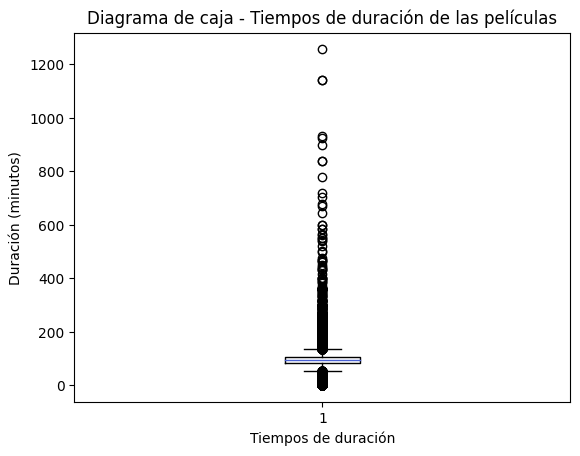

In [94]:
# Cambiamos el tipo de dato de runtime a cual corresponda
df_movies['runtime'] = df_movies['runtime'].astype(float)

# Creamos el diagrama de caja
plt.boxplot(df_movies['runtime'])

plt.xlabel('Tiempos de duración')
plt.ylabel('Duración (minutos)')
plt.title('Diagrama de caja - Tiempos de duración de las películas')

plt.show()

In [95]:
# Calculamos la media y la mediana de la columna runtime
media = df_movies['runtime'].mean()

mediana = df_movies['runtime'].median()

print("Media:", media, "Mediana:", mediana)

Media: 93.32392463562033 Mediana: 95.0


*Este gráfico nos indica que hay valores muy arriba del promedio. Esto podría deberse a la presencia de miniseries o documentales con varios episodios, que tienen una duración total mucho mayor que las películas convencionales. Estos valores atípicos pueden influir en el análisis de la duración promedio de las películas, ya que pueden distorsionar el resultado general. De todos modos, es importante destacar que en el análisis de la duración de las películas, también encontramos una cantidad considerable de valores cercanos a cero en el diagrama de caja. Esta situación es el resultado de las películas que no tienen información sobre su duración en la base de datos utilizada.*

*Además, al calcular la media y la mediana, se obtuvo un valor de 93 para la media de la duración de las películas, lo que indica que, en promedio, las películas tienen una duración de 93 minutos. Por otro lado, la mediana de la duración fue calculada en 95 minutos, lo que significa que el 50% de las películas tienen una duración igual o menor a 95 minutos.*

        ► Géneros más presente en las películas. 📺

In [96]:
# Creamos una lista vacía para almacenar los géneros individuales
individual_genres = []

# Iteramos sobre cada fila del DataFrame
for genres in df_movies['genres_names']:
    genres_cleaned = genres.strip("[]'")
    genres_list = genres_cleaned.split("', '")

    # Agregamo los géneros individuales a la lista
    individual_genres.extend(genres_list)

individual_genres = [genre.strip() for genre in individual_genres]

# Calculamos la frecuencia de cada género y seleccionamos los más vistos
top_genres = pd.Series(individual_genres).value_counts().nlargest(10)

# Creamos un DataFrame con los géneros y sus frecuencias para poder utilizarlos en el próximo gráfico
genre_table = pd.DataFrame({'Genre': top_genres.index, 'Frequency': top_genres.values})

# Mostrar la tabla resultante
print(genre_table)

             Genre  Frequency
0            Drama      18617
1           Comedy      12552
2         Thriller       6865
3          Romance       6227
4           Action       6124
5           Horror       4221
6            Crime       3958
7      Documentary       3783
8        Adventure       3233
9  Science Fiction       2829


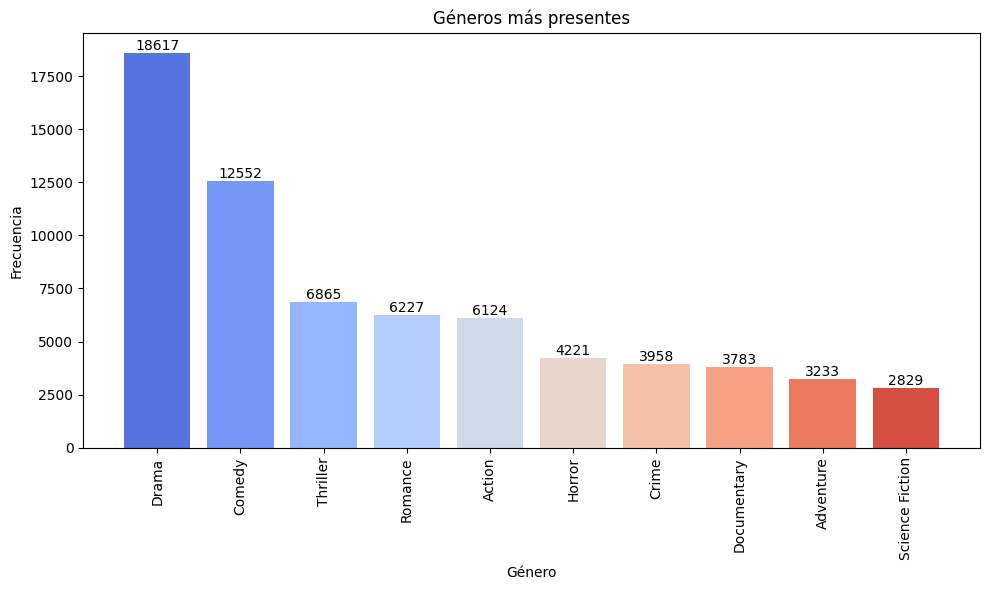

In [97]:
# Ya con el paso previo realizado, ordenamos la tabla por frecuencia de mayor a menor
genre_table = genre_table.sort_values(by='Frequency', ascending=False)

# Creamos una paleta de colores
colors = sns.color_palette('coolwarm', len(genre_table))

# Creamos el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
bars = plt.bar(genre_table['Genre'], genre_table['Frequency'], color=colors)

# Ajustamos los nombres de los géneros en el eje x
plt.xticks(rotation='vertical')

# Se colocan etiquetas y título del gráfico
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Géneros más presentes')

# Añadimos etiquetas de valor encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

        ► Porcentajes de los géneros más presentes en las películas. 🧮

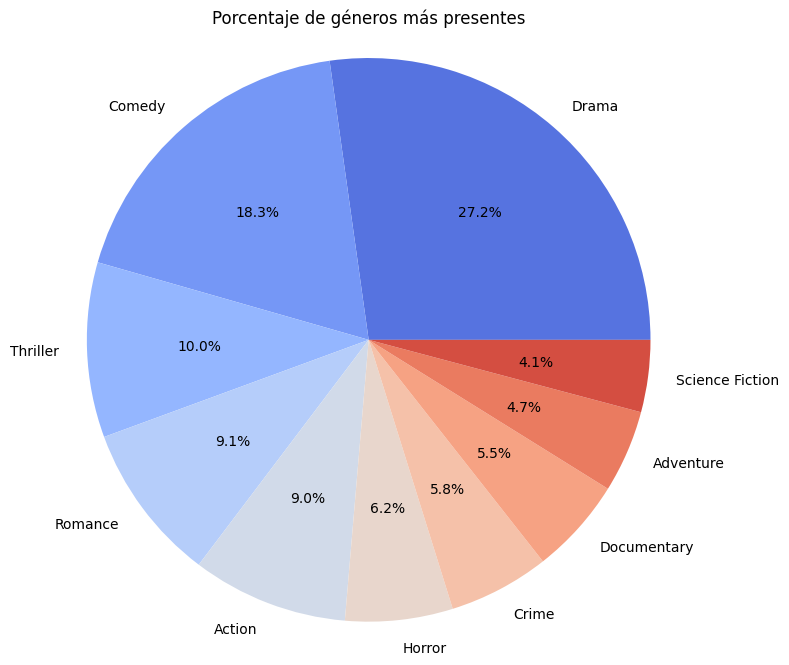

In [98]:
# Creamos el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(genre_table['Frequency'], labels=genre_table['Genre'], colors=colors, autopct='%1.1f%%')

plt.axis('equal')

plt.title('Porcentaje de géneros más presentes')

plt.show()

*Con el primer gráfico se puede observar la distribución de géneros en términos absolutos, es decir, el número de películas de cada género. Se puede apreciar que el género "Drama" es el que predomina, seguido de la comedia.*

*En el segundo gráfico, se calculó el porcentaje de cada género en relación al total de películas en el dataset. Así, se puede tener una visión más clara de la proporción que representa cada género en el conjunto de datos. En este caso, se puede concluir que el género "Drama" tiene una presencia del 27,2%, mientras que la comedia representa el 18,3%.*

*Esta información nos permite entender mejor la distribución de géneros y su relevancia dentro del conjunto de películas analizado.*

        ► Estrenos por año. 📈

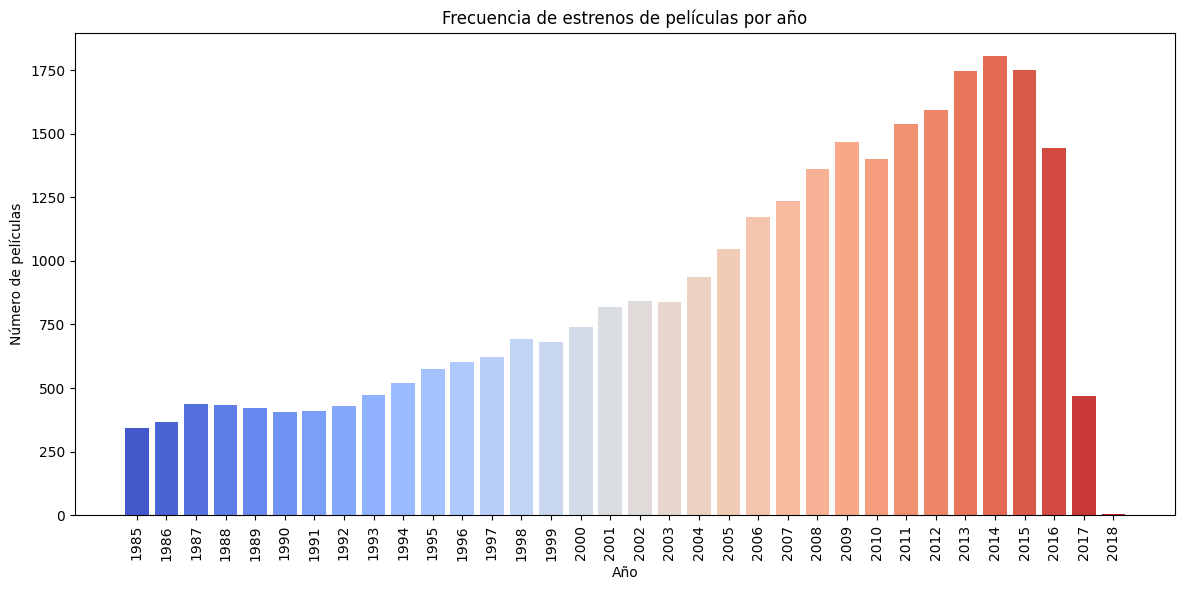

In [99]:
# Obtenemos el rango de todos los años posibles
all_years = range(1985, 2019)

# Recuento de películas por año
movies_per_year = df_movies['release_year'].value_counts().reindex(all_years, fill_value=0)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
colors = sns.color_palette('coolwarm', len(movies_per_year))
bars = plt.bar(movies_per_year.index, movies_per_year.values, color=colors)

plt.xticks(rotation='vertical')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Frecuencia de estrenos de películas por año')

# Ajustamos el espacio entre las etiquetas del eje x
plt.tight_layout()

plt.xticks(movies_per_year.index, movies_per_year.index)

plt.show()

*Podemos observar que a lo largo de los años, la cantidad de películas estrenadas ha ido en aumento, siendo el año 2014 el que registra la mayor cantidad de películas estrenadas. Sin embargo, se decidió acortar la tabla en el año 2018 debido a que se observó una disminución drástica en la cantidad de películas a partir del año 2017. Esto sugiere que podría haber una falta significativa de información para los años posteriores.*

        ► Estrenos por mes. 📊

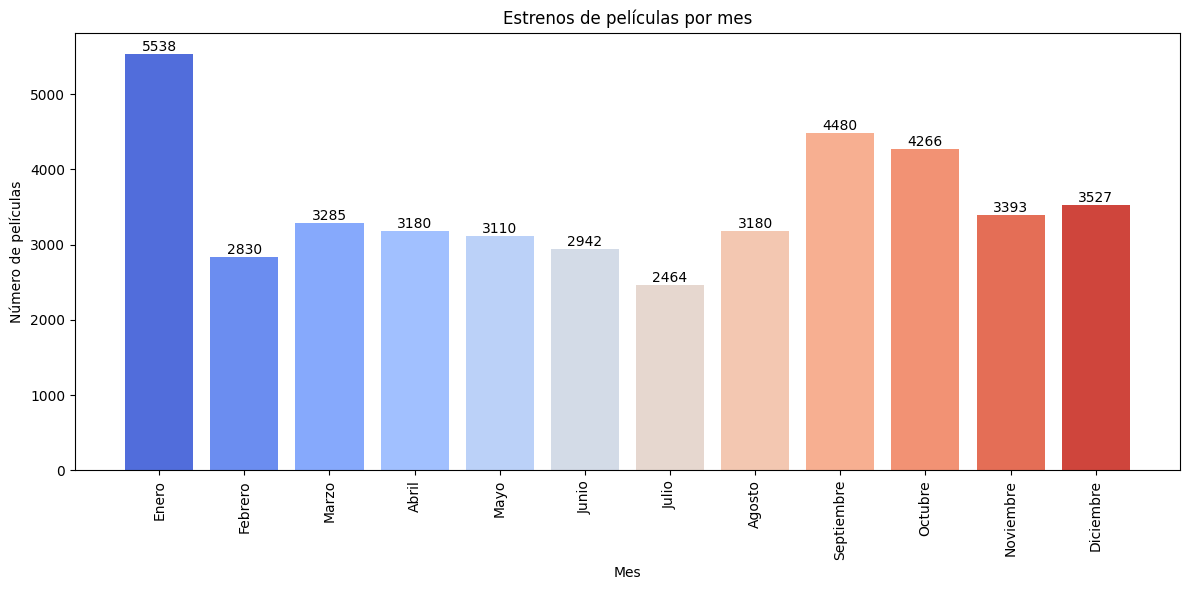

In [100]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# Obtenemos el recuento de películas por mes
movies_per_month = df_movies['release_date'].dt.month.value_counts().sort_index()

# Mapeamos el número de mes al nombre del mes
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
movies_per_month.index = [month_names[i-1] for i in movies_per_month.index]

colors = sns.color_palette('coolwarm', len(movies_per_month))

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(movies_per_month.index, movies_per_month.values, color=colors)

# Ajustamos los nombres de los meses en el eje x
plt.xticks(rotation='vertical')

# Se colocan etiquetas y título del gráfico
plt.xlabel('Mes')
plt.ylabel('Número de películas')
plt.title('Estrenos de películas por mes')

# Añadimos etiquetas de valor encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

*Observamos que enero es el mes con mayor cantidad de estrenos a lo largo de los años.*

        ► Top 15 mejores películas calificadas. 🥇

In [101]:
top_movies = df_movies.nlargest(15, 'vote_average')
print(top_movies[['title', 'vote_average']])

                                                   title  vote_average
186                                             Reckless          10.0
394                                 Girl in the Cadillac          10.0
706             The Haunted World of Edward D. Wood, Jr.          10.0
736               Carmen Miranda: Bananas Is My Business          10.0
1628                            Other Voices Other Rooms          10.0
1754                               Dancer, Texas Pop. 81          10.0
2101                                   The Farmer's Wife          10.0
2623                                    Stiff Upper Lips          10.0
2914                                           Ten Benny          10.0
3123   Gendernauts: A Journey Through Shifting Identi...          10.0
4000                                         Simon Magus          10.0
8699              Common Threads: Stories from the Quilt          10.0
9140                    High Roller: The Stu Ungar Story          10.0
10155 

        ► Top 15 películas más rentables. 🥇

In [102]:
# Ordenamos la columna "return" de forma descendente
top_movies = df_movies.sort_values(by='return', ascending=False).head(15)

top_movies['return'] = top_movies['return'].round(2)

print("Las 15 películas más rentables son:")
print(top_movies[['title', 'return']])

Las 15 películas más rentables son:
                                 title       return
3954                    Less Than Zero  12396383.00
3304                      Modern Times   8500000.00
13846            Welcome to Dongmakgol   4197476.62
21182                   Aquí Entre Nos   2755584.00
2291           The Karate Kid, Part II   1018619.28
24538                        Nurse 3-D   1000000.00
15996               From Prada to Nada     26881.72
13679              Paranormal Activity     12890.39
8037                         Tarnation      5330.34
2568           The Blair Witch Project      4133.33
38572  The Tiger: An Old Hunter's Tale      2216.69
18389          Love, Wedding, Marriage      1378.00
3514                        Eraserhead       700.00
4266             The Way of the Dragon       653.85
2235                    Pink Flamingos       500.00


        ► Actores con más presencia en películas. 🎥

In [103]:
# Normalizamos los nombres de los actores
def normalize_names(name):
    name = re.sub(r"[\[\]']", "", name)
    name = name.strip(". ")
    return name

# Obtenemos los 10 actores con más presencia en películas y eliminamos filas sin información del actor
top_actors_presence = df_movies['names_actors'].apply(normalize_names).str.split(', ').explode()
top_actors_presence = top_actors_presence[top_actors_presence != '']

# Contamos los valores y obtener los 10 actores con mayor presencia en películas
top_actors_presence = top_actors_presence.value_counts().head(10)

print("Actores con más presencia en películas:")
print(top_actors_presence)

Actores con más presencia en películas:
Jr.                  276
Bess Flowers         221
Christopher Lee      139
John Wayne           122
Samuel L. Jackson    116
Jackie Chan          105
Frank Welker         105
John Carradine       103
Donald Sutherland    103
Gérard Depardieu     103
Name: names_actors, dtype: int64


        ► Directores con más películas estrenadas. 🎬

In [104]:
# Obtenemos los 10 directores con mayor cantidad de películas estrenadas
top_directors = df_movies['director'].apply(normalize_names).value_counts().head(10)

print("Directores con mayor cantidad de películas estrenadas:")
print(top_directors)

Directores con mayor cantidad de películas estrenadas:
Sin información       812
John Ford              64
Michael Curtiz         61
Werner Herzog          53
Alfred Hitchcock       52
Woody Allen            49
Jean-Luc Godard        45
Sidney Lumet           44
Georges Méliès         43
William A. Wellman     42
Name: director, dtype: int64


In [105]:
df_movies.to_csv('Movies_EDA.csv',index=False)